In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
#loading the dataset
df = pd.read_csv("D:\\Downloads\\Titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#handling missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
df.drop("Cabin", axis=1, inplace=True)

In [6]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [8]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
encoder = LabelEncoder()

In [11]:
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


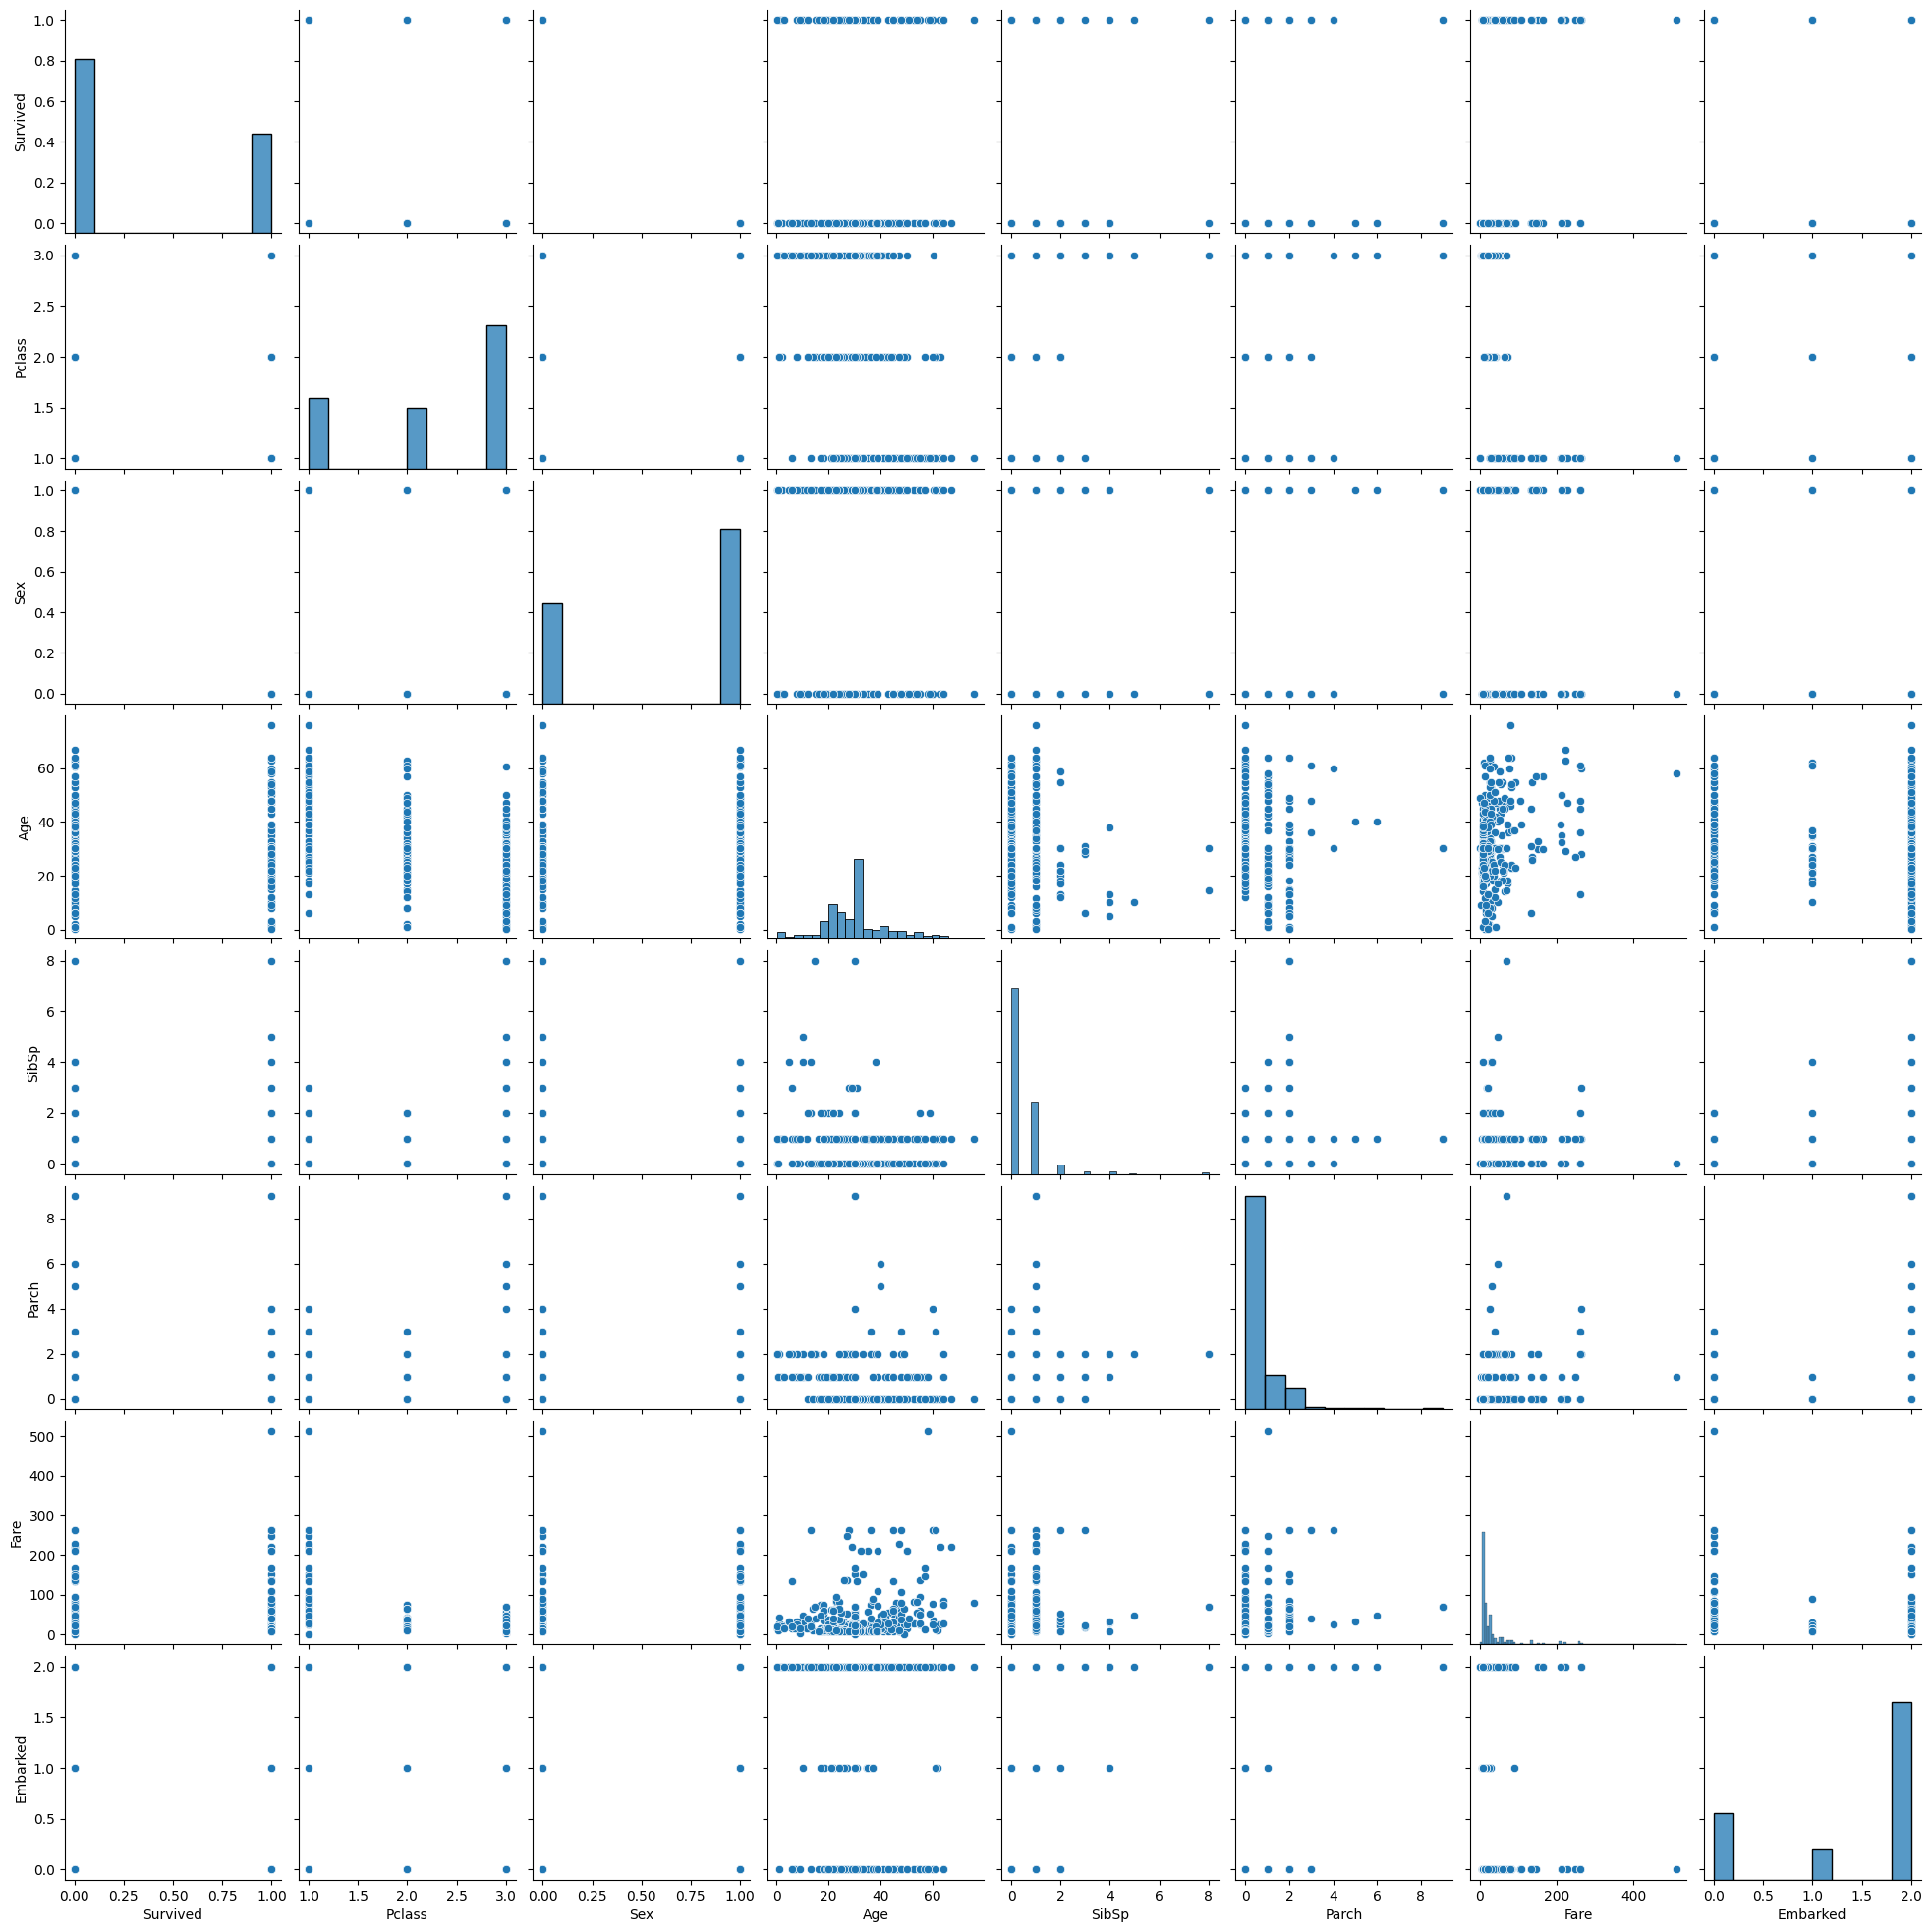

In [14]:
sns.pairplot(df)

In [15]:
X = df.drop(columns="Survived").values
y = df["Survived"].values

In [16]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#evaluate output with different models

In [17]:
#logistic regression
lr_model = LogisticRegression(solver="lbfgs", max_iter=3000)

In [18]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [19]:
lr_pred = lr_model.predict(X_test)

In [20]:
print("Accuracy:- ", accuracy_score(y_test, lr_pred))
print("Precision:- ", precision_score(y_test, lr_pred))
print("Recall:- ", recall_score(y_test, lr_pred))
print("F1 Score:- ", f1_score(y_test, lr_pred))

Accuracy:-  1.0
Precision:-  1.0
Recall:-  1.0
F1 Score:-  1.0


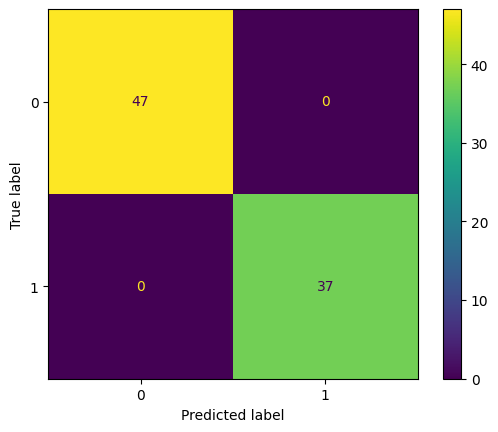

In [21]:
lr_cm = confusion_matrix(y_test, lr_pred, labels=lr_model.classes_)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_)
lr_disp.plot()

In [22]:
#knearest neighbors
kn_model = KNeighborsClassifier(n_neighbors=4)

In [23]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
kn_pred = kn_model.predict(X_test)

In [25]:
print("Accuracy:- ", accuracy_score(y_test, kn_pred))
print("Precision:- ", precision_score(y_test, kn_pred))
print("Recall:- ", recall_score(y_test, kn_pred))
print("F1 Score:- ", f1_score(y_test, kn_pred))

Accuracy:-  0.6071428571428571
Precision:-  0.625
Recall:-  0.2702702702702703
F1 Score:-  0.3773584905660377


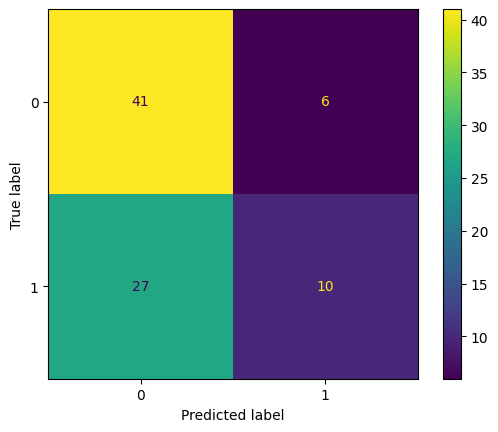

In [26]:
kn_cm = confusion_matrix(y_test, kn_pred, labels=kn_model.classes_)
kn_disp = ConfusionMatrixDisplay(confusion_matrix=kn_cm, display_labels=kn_model.classes_)
kn_disp.plot()

In [27]:
#decision tree classifier
dt_model = DecisionTreeClassifier()

In [28]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dt_pred = dt_model.predict(X_test)

In [30]:
print("Accuracy:- ", accuracy_score(y_test, dt_pred))
print("Precision:- ", precision_score(y_test, dt_pred))
print("Recall:- ", recall_score(y_test, dt_pred))
print("F1 Score:- ", f1_score(y_test, dt_pred))

Accuracy:-  1.0
Precision:-  1.0
Recall:-  1.0
F1 Score:-  1.0


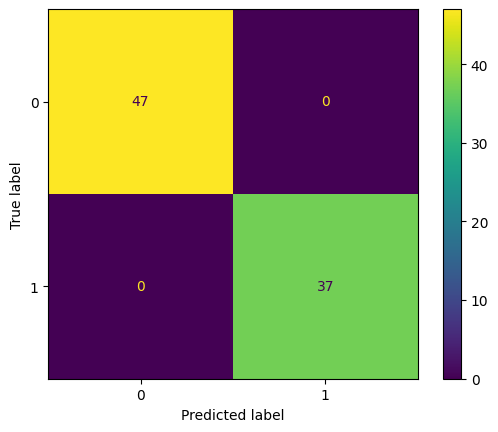

In [31]:
dt_cm = confusion_matrix(y_test, dt_pred, labels=dt_model.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot()